In [2]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



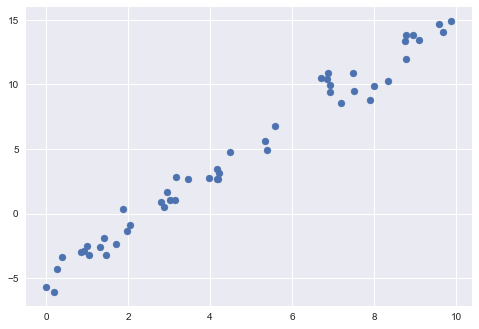

In [3]:

rng = np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)
plt.scatter(x,y)


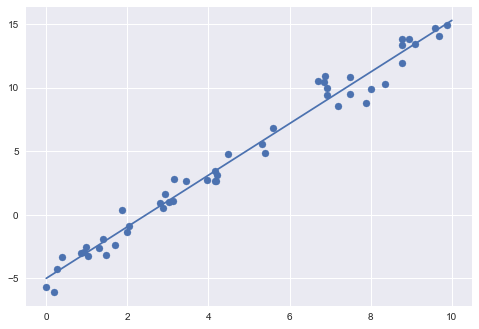

In [7]:

from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis],y)
xfit=np.linspace(0,10,1000)
yfit=model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)


In [8]:

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


Model slope:     2.02720881036
Model intercept: -4.99857708555


In [11]:

# multidimensional linear models 
# using NumPy's matrix multiplication operator

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])




In [12]:


model.fit(X, y)
print(model.intercept_)
print(model.coef_)


0.5
[ 1.5 -2.   1. ]


In [24]:

# PolynomialFeatures transformer
# polynomial regression
# What we have effectively done is taken our one-dimensional x values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between x and y.


0.5
[ 1.5 -2.   1. ]


In [25]:


from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])






array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [27]:

# make a 7th degree polynomial function to fit complex points
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())



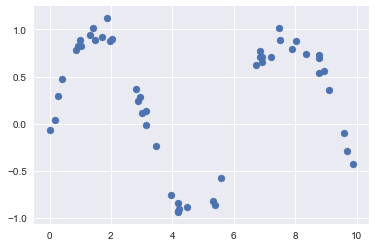

In [28]:

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)



AttributeError: 'Pipeline' object has no attribute 'coef_'

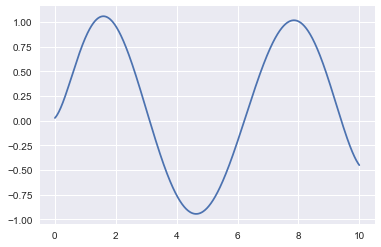

In [31]:

poly_model.fit(x[:,np.newaxis],y)
yfit=poly_model.predict(xfit[:,np.newaxis])

plt.plot(xfit,yfit)




In [37]:

# Gaussian basis functions
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    



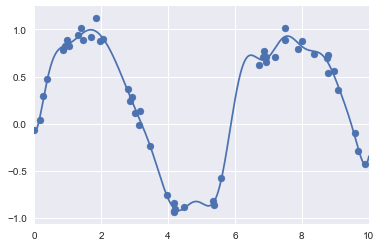

In [38]:

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);


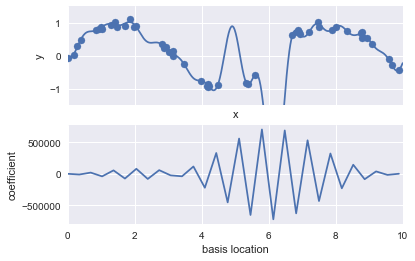

In [39]:

def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    



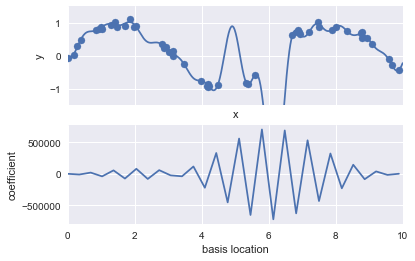

In [40]:

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)


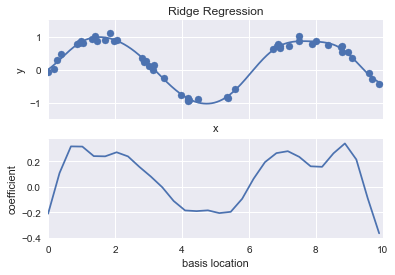

In [41]:

#Ridge regression (L2 Regularization)
#this proceeds by penealizing the sum of squares of model coefficients.
# this type of penalized model is built into scikit-learn with the ridge estimator


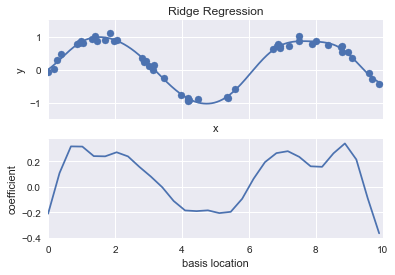

In [42]:


from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')


/Users/maggie/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


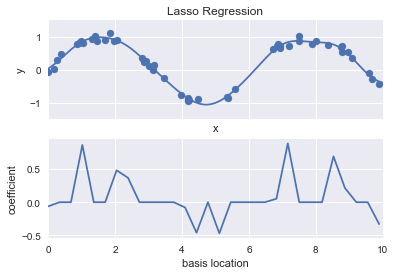

In [43]:

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')


In [ ]:


# Gaussian Basis Function
from sklearn.base import BaseEstimator, 



/Users/maggie/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


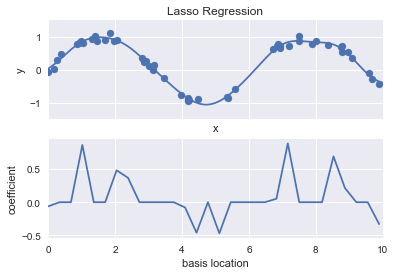

In [44]:

from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')


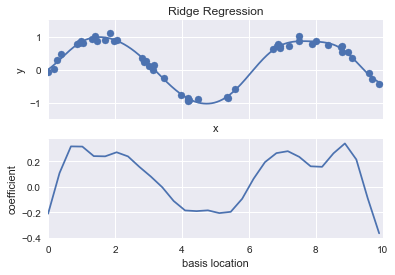

In [45]:


from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')
